In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn import metrics

%matplotlib inline
from matplotlib import style
style.use("seaborn")
import seaborn as sns

from IPython.display import HTML
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-02add3d62716>:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use("seaborn")


In [2]:
# reading data
calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")

In [4]:
## Data description

In [3]:

calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:


exercise.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:

df = exercise.merge(calories , on = "User_ID")
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
df.shape

(15000, 9)

In [7]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [9]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [10]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [11]:
df.duplicated().sum()

0

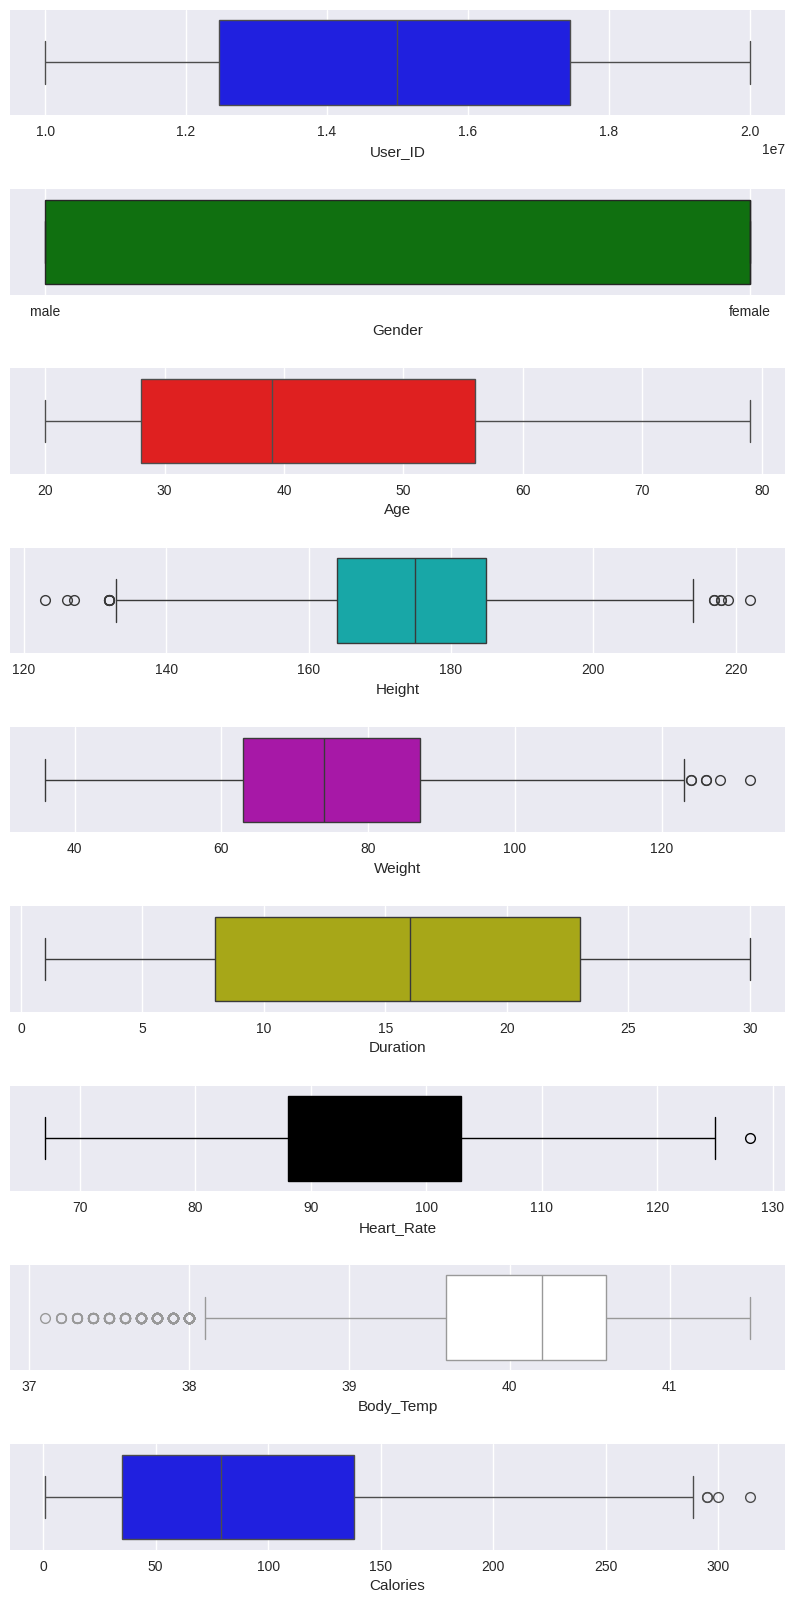

In [12]:
c = ['b' , 'g' , 'r' , 'c' , 'm' , 'y' , 'k' , 'w' , 'b']
fig1 , axes = plt.subplots(len(df.columns) , 1 , figsize = (10 , 20))
plt.subplots_adjust(wspace = 0.3 , hspace = 0.7)
axes = axes.flatten()             #for using axes indeces with one dimention array instead of two dimension
for i , column in zip(range(len(df.columns)) , df.columns):
  try:
    sns.boxplot(data = df , x = column , color = c[i] , ax = axes[i])
  except:
    fig1.delaxes(axes[i])
    continue


In [13]:
df.drop(columns = "User_ID" , inplace = True)

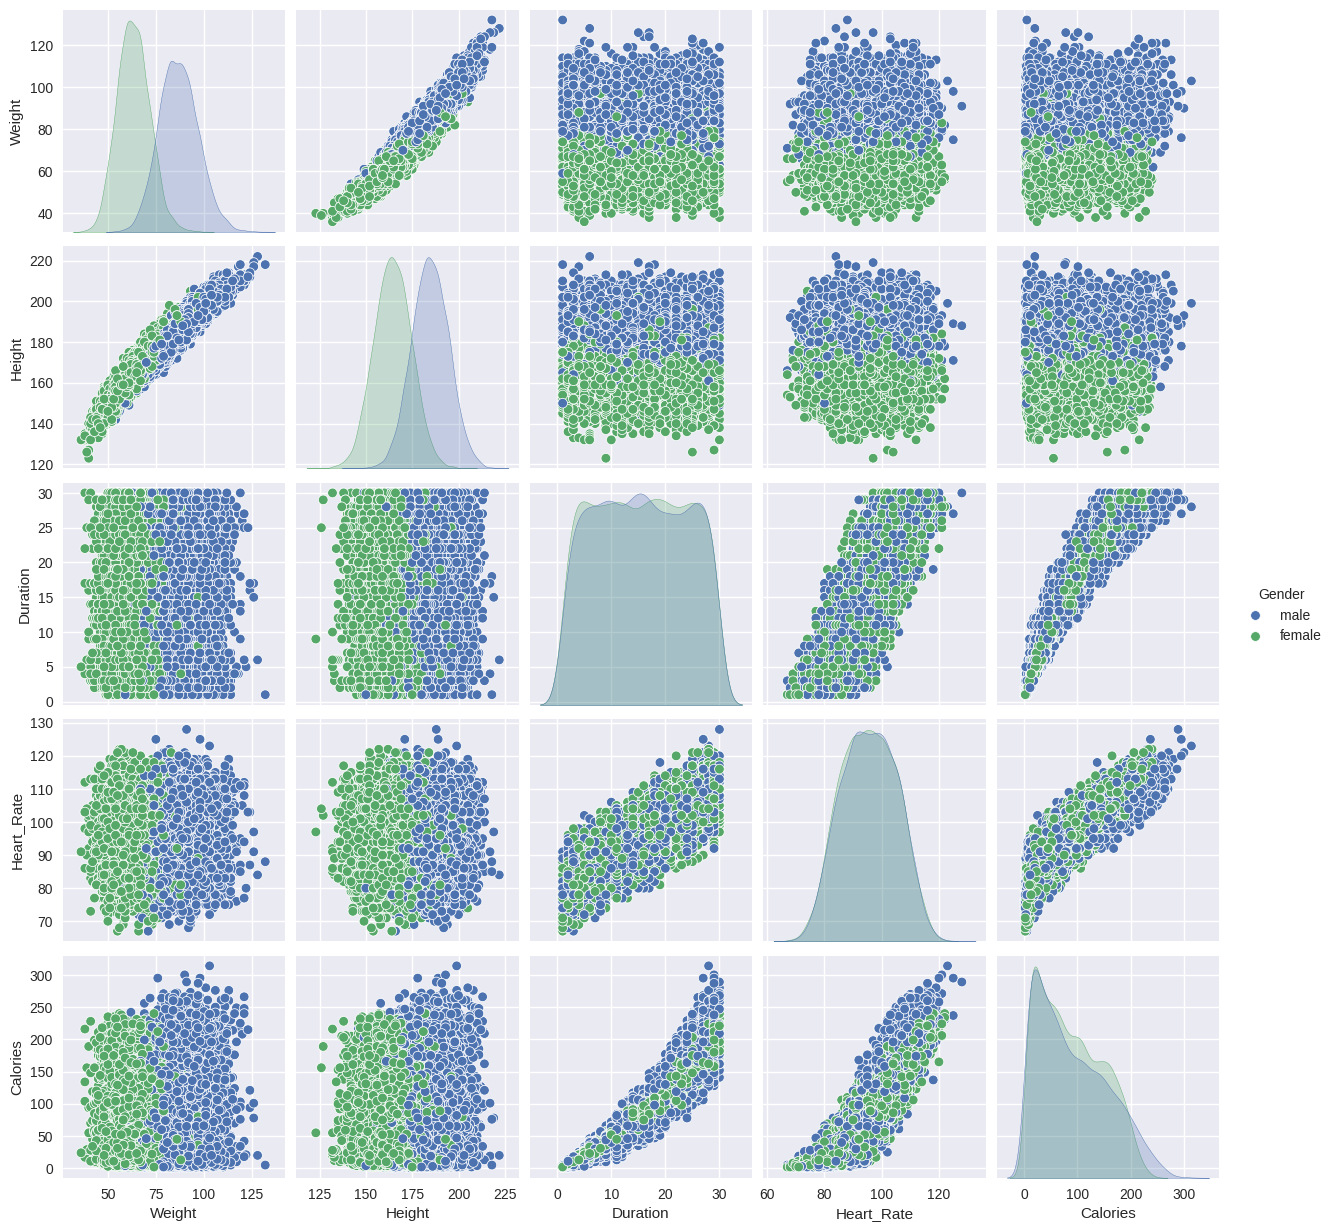

In [14]:
sns.pairplot(df[["Weight" , "Height" , "Duration" , "Heart_Rate" , "Calories" , "Gender"]] , hue = "Gender")


<Axes: >

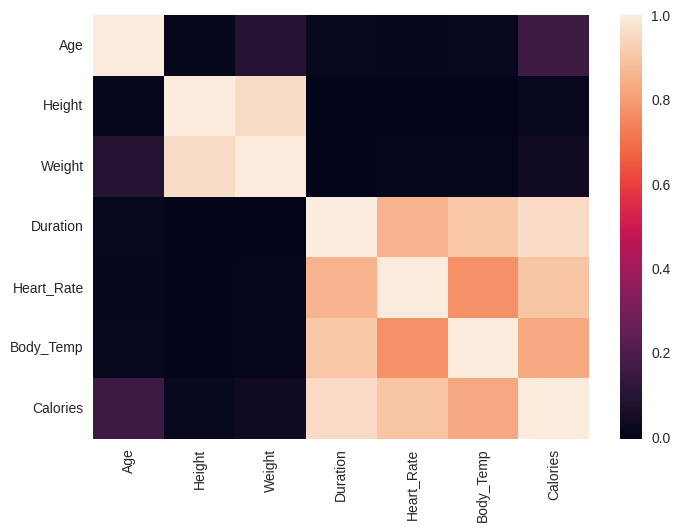

In [15]:
sns.heatmap(df.corr())

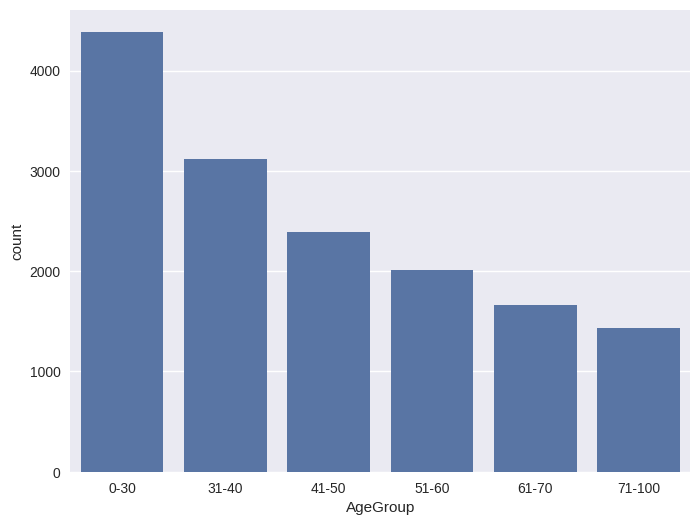

In [17]:
bins = [0, 30, 40, 50, 60, 70, 100]
labels = ['0-30', '31-40', '41-50', '51-60', '61-70', '71-100']

# Create a new column 'AgeGroup' with age ranges
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Set the plot size
plt.rcParams["figure.figsize"] = (8, 6)

# Create a countplot with age bins
sns.countplot(data=df, x='AgeGroup')

# Show the plot
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

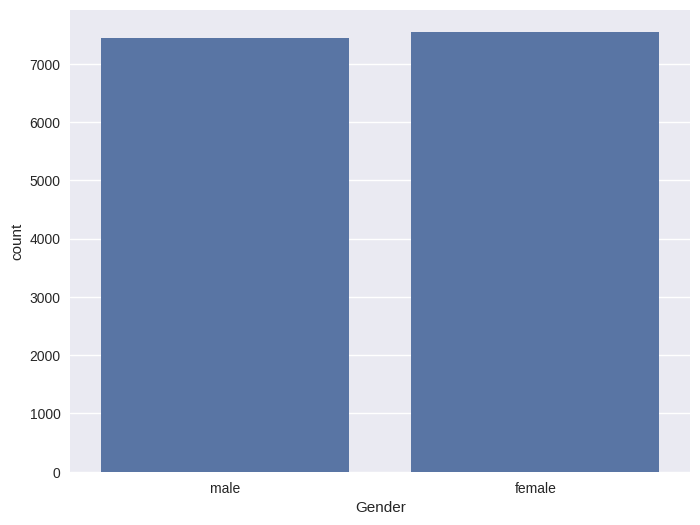

In [18]:
plt.rcParams["figure.figsize"] = 8 , 6
sns.countplot(data = df , x = "Gender")


In [19]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)
exercise_train_data , exercise_test_data = train_test_split(df_encoded , test_size = 0.2 , random_state = 1)


In [20]:
X_train = exercise_train_data.drop(["Calories", "AgeGroup"], axis=1)

y_train = exercise_train_data["Calories"]

X_test = exercise_test_data.drop(["Calories", "AgeGroup"], axis=1)
y_test = exercise_test_data["Calories"]



In [21]:
print(X_train.shape)
print(X_test.shape)

(12000, 7)
(3000, 7)


In [42]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

 # Model training with ANN
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='linear'))  # Linear activation for regression
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Training the ANN model
# Training the ANN model
ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)


# Making predictions
ann_predictions = ann_model.predict(X_test)

# Evaluating the model
ann_mse = mean_squared_error(y_test, ann_predictions)
print(f'Mean Squared Error (MSE): {ann_mse}')

94/94 [==============================] - 0s 1ms/step
Mean Squared Error (MSE): 54.0796842438261


In [38]:

# R-squared
from sklearn.metrics import r2_score
ann_r2 = r2_score(y_test, ann_predictions)



print(f'R-squared (R2): {ann_r2}')


Mean Squared Error (MSE): 45.205421142096746
R-squared (R2): 0.988740780900463


In [55]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00


In [57]:
%%writefile pred.py

import streamlit as st
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics
import time

from matplotlib import style
style.use("seaborn")
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


st.write("## Calories burned Prediction")
st.write("In this WebApp you will be able to observe your predicted calories burned in your body.Only thing you have to do is pass your parameters such as `Age` , `Gender` , `BMI` , etc into this WebApp and then you will be able to see the predicted value of kilocalories that burned in your body.")


st.sidebar.header("User Input Parameters : ")
def user_input_features():
    global age , bmi , duration , heart_rate , body_temp
    age = st.sidebar.slider("Age : " , 10 , 100 , 30)
    bmi = st.sidebar.slider("BMI : " , 15 , 40 , 20)
    duration = st.sidebar.slider("Duration (min) : " , 0 , 35 , 15)
    heart_rate = st.sidebar.slider("Heart Rate : " , 60 , 130 , 80)
    body_temp = st.sidebar.slider("Body Temperature (C) : " , 36 , 42 , 38)
    gender_button = st.sidebar.radio("Gender : ", ("Male" , "Female"))

    if gender_button == "Male":
        gender = 1
    else:
        gender = 0

    data = {
    "age" : age,
    "bmi" : bmi,
    "duration" : duration,
    "heart_rate" : heart_rate,
    "body_temp" : body_temp,
    "gender" : ["Male" if gender_button == "Male" else "Female"]
    }

    data_model = {
    "age" : age,
    "bmi" : bmi,
    "duration" : duration,
    "heart_rate" : heart_rate,
    "body_temp" : body_temp,
    "gender" : gender
    }

    features = pd.DataFrame(data_model, index=[0])
    data = pd.DataFrame(data, index=[0])
    return features , data

df , data = user_input_features()
st.write("---")
st.header("Your Parameters : ")
latest_iteration = st.empty()
bar = st.progress(0)
for i in range(100):
  # Update the progress bar with each iteration
  bar.progress(i + 1)
  time.sleep(0.01)
st.write(data)

calories = pd.read_csv("calories.csv")
exercise = pd.read_csv("exercise.csv")

exercise_df = exercise.merge(calories, on="User_ID")
exercise_df.drop(columns="User_ID", inplace=True)
exercise_train_data , exercise_test_data = train_test_split(exercise_df , test_size = 0.2 , random_state = 1)

for data in [exercise_train_data , exercise_test_data]:         # adding BMI column to both training and test sets
    data["BMI"] = data["Weight"] / ((data["Height"] / 100) ** 2)
    data["BMI"] = round(data["BMI"] , 2)

exercise_train_data = exercise_train_data[["Gender" , "Age" , "BMI" , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
exercise_test_data = exercise_test_data[["Gender" , "Age" , "BMI"  , "Duration" , "Heart_Rate" , "Body_Temp" , "Calories"]]
exercise_train_data = pd.get_dummies(exercise_train_data, drop_first = True)
exercise_test_data = pd.get_dummies(exercise_test_data, drop_first = True)

# Model training with ANN
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=exercise_train_data.shape[1]-1, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='linear'))  # Linear activation for regression
ann_model.compile(optimizer='adam', loss='mean_squared_error')

X_train = exercise_train_data.drop("Calories" , axis = 1)
y_train = exercise_train_data["Calories"]

X_test = exercise_test_data.drop("Calories" , axis = 1)
y_test = exercise_test_data["Calories"]

# Training the ANN model
ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Making predictions
ann_predictions = ann_model.predict(X_test)

# Evaluating the model
ann_mse = mean_squared_error(y_test, ann_predictions)

# Displaying results
st.write("ANN Mean Squared Error (MSE):", round(ann_mse, 2))
prediction = ann_model.predict(df)
st.write("---")
st.header("Prediction : ")
latest_iteration = st.empty()
bar = st.progress(0)
for i in range(100):
    # Update the progress bar with each iteration
    bar.progress(i + 1)
    time.sleep(0.01)

st.write(round(prediction[0][0], 2), "   **kilocalories**")

st.write("---")
st.header("Similar Results : ")
latest_iteration = st.empty()


prediction_range = [prediction[0][0] - 10, prediction[0][0] + 10]

ds = exercise_df[(exercise_df["Calories"] >= prediction_range[0]) & (exercise_df["Calories"] <= prediction_range[1])]
st.write(ds.sample(5))

st.write("---")
st.header("General Information : ")

boolean_age = (exercise_df["Age"] < age).tolist()
boolean_duration = (exercise_df["Duration"] < duration).tolist()
boolean_body_temp = (exercise_df["Body_Temp"] < body_temp).tolist()
boolean_heart_rate= (exercise_df["Heart_Rate"] < heart_rate).tolist()

st.write("You are older than %" , round(sum(boolean_age) / len(boolean_age) , 2) * 100 , "of other people.")
st.write("Your had higher exercise duration than %" , round(sum(boolean_duration) / len(boolean_duration) , 2) * 100 , "of other people.")
st.write("You had more heart rate than %" , round(sum(boolean_heart_rate) / len(boolean_heart_rate) , 2) * 100 , "of other people during exercise.")
st.write("You had higher body temperature  than %" , round(sum(boolean_body_temp) / len(boolean_body_temp) , 2) * 100 , "of other people during exercise.")


Writing pred.py


In [58]:
!wget -q -O - ipv4.icanhazip.com

34.73.211.111


In [3]:
!streamlit run pred.py & npx localtunnel --port 8501


[..................] - fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.211.111:8501

npx: installed 22 in 2.523s
your url is: https://khaki-cats-guess.loca.lt
2024-02-28 05:12:43.012693: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 05:12:43.012768: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 05:12:43.014366: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-28 05:12:43.024056: I tensorflow/core/platform/cpu_feature_guar